In [ ]:
# Registration Number: 23BAI10355
# NAME: ANVESHA RASTOGI

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression


In [ ]:
df=pd.read_csv('/content/heart.csv')

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
from sklearn.model_selection import train_test_split
X=df.drop('target',axis=1)
Y=df['target']

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
model=LogisticRegression(max_iter=1000)
model.fit(X_train,Y_train)

LogisticRegression(max_iter=1000)

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(Y_test, y_pred))

y_proba = model.predict_proba(X_test)[:,1]
print("ROC-AUC:", roc_auc_score(Y_test, y_proba))


Accuracy: 0.7951219512195122
ROC-AUC: 0.8770226537216829


In [ ]:
sample_point = pd.DataFrame([{
    'age': 54,
    'sex': 1,
    'cp': 2,
    'trestbps': 140,
    'chol': 220,
    'fbs': 0,
    'restecg': 1,
    'thalach': 150,
    'exang': 0,
    'oldpeak': 1.2,
    'slope': 1,
    'ca': 0,
    'thal': 2
}])

prediction=model.predict(sample_point)
print(prediction[0])

1


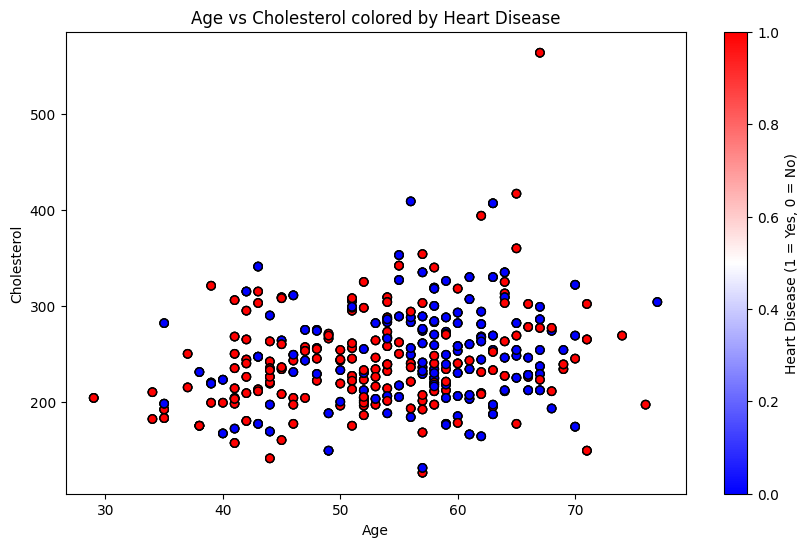

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['age'], df['chol'], c=df['target'], cmap='bwr', edgecolor='k')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.title('Age vs Cholesterol colored by Heart Disease')
plt.colorbar(scatter, label='Heart Disease (1 = Yes, 0 = No)')
plt.show()